**Task 4**

a) To evaluate historical performance, we begin by analyzing the cumulative returns of the portfolios. Each month, we adjust the Target portfolio's allocation, gradually reducing the S&P 500 exposure from 90% to 40%. This monthly restructuring allows for a more dynamic and responsive approach to changing market conditions.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\vikto\AppData\Local\Temp\ipykernel_7860\2887213215.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.018776513668603976' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  aligned_returns.at[aligned_returns.index[i], 'Target Fund'] = new_value


NaN values in SP500:
0
NaN values in VUSTX:
0
NaN values in SP500 pct change:
1
NaN values in VUSTX pct change:
1


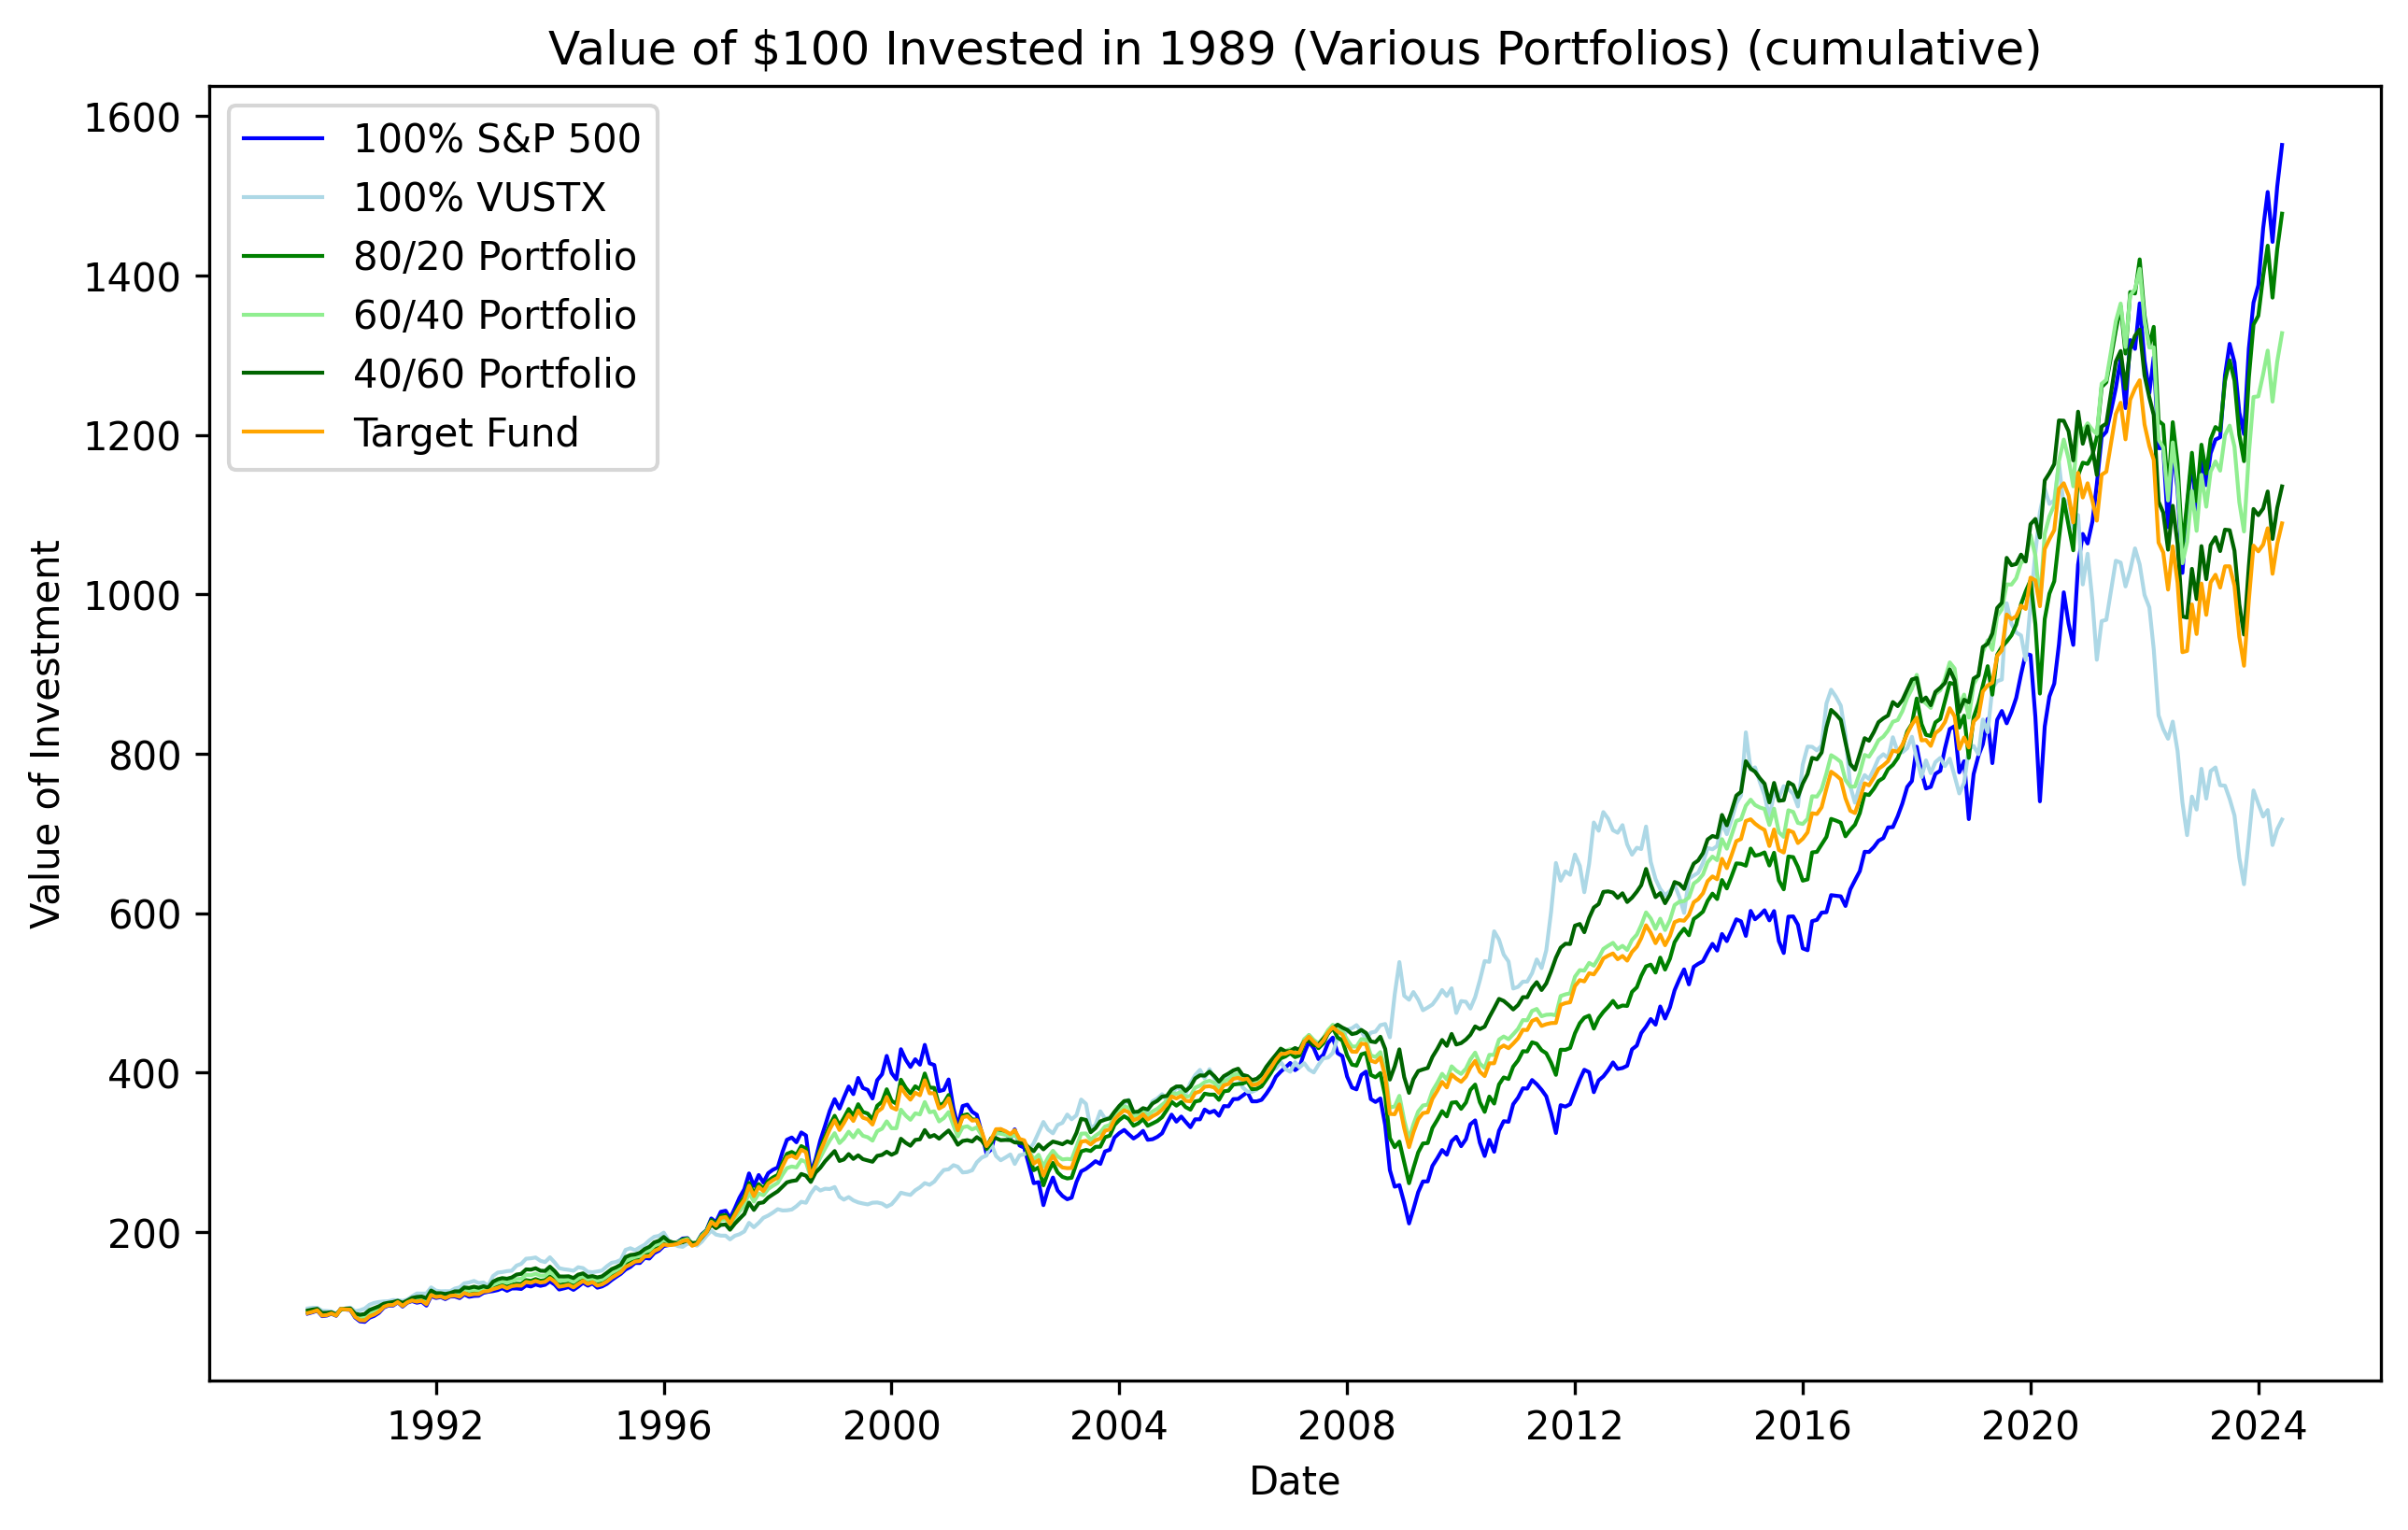

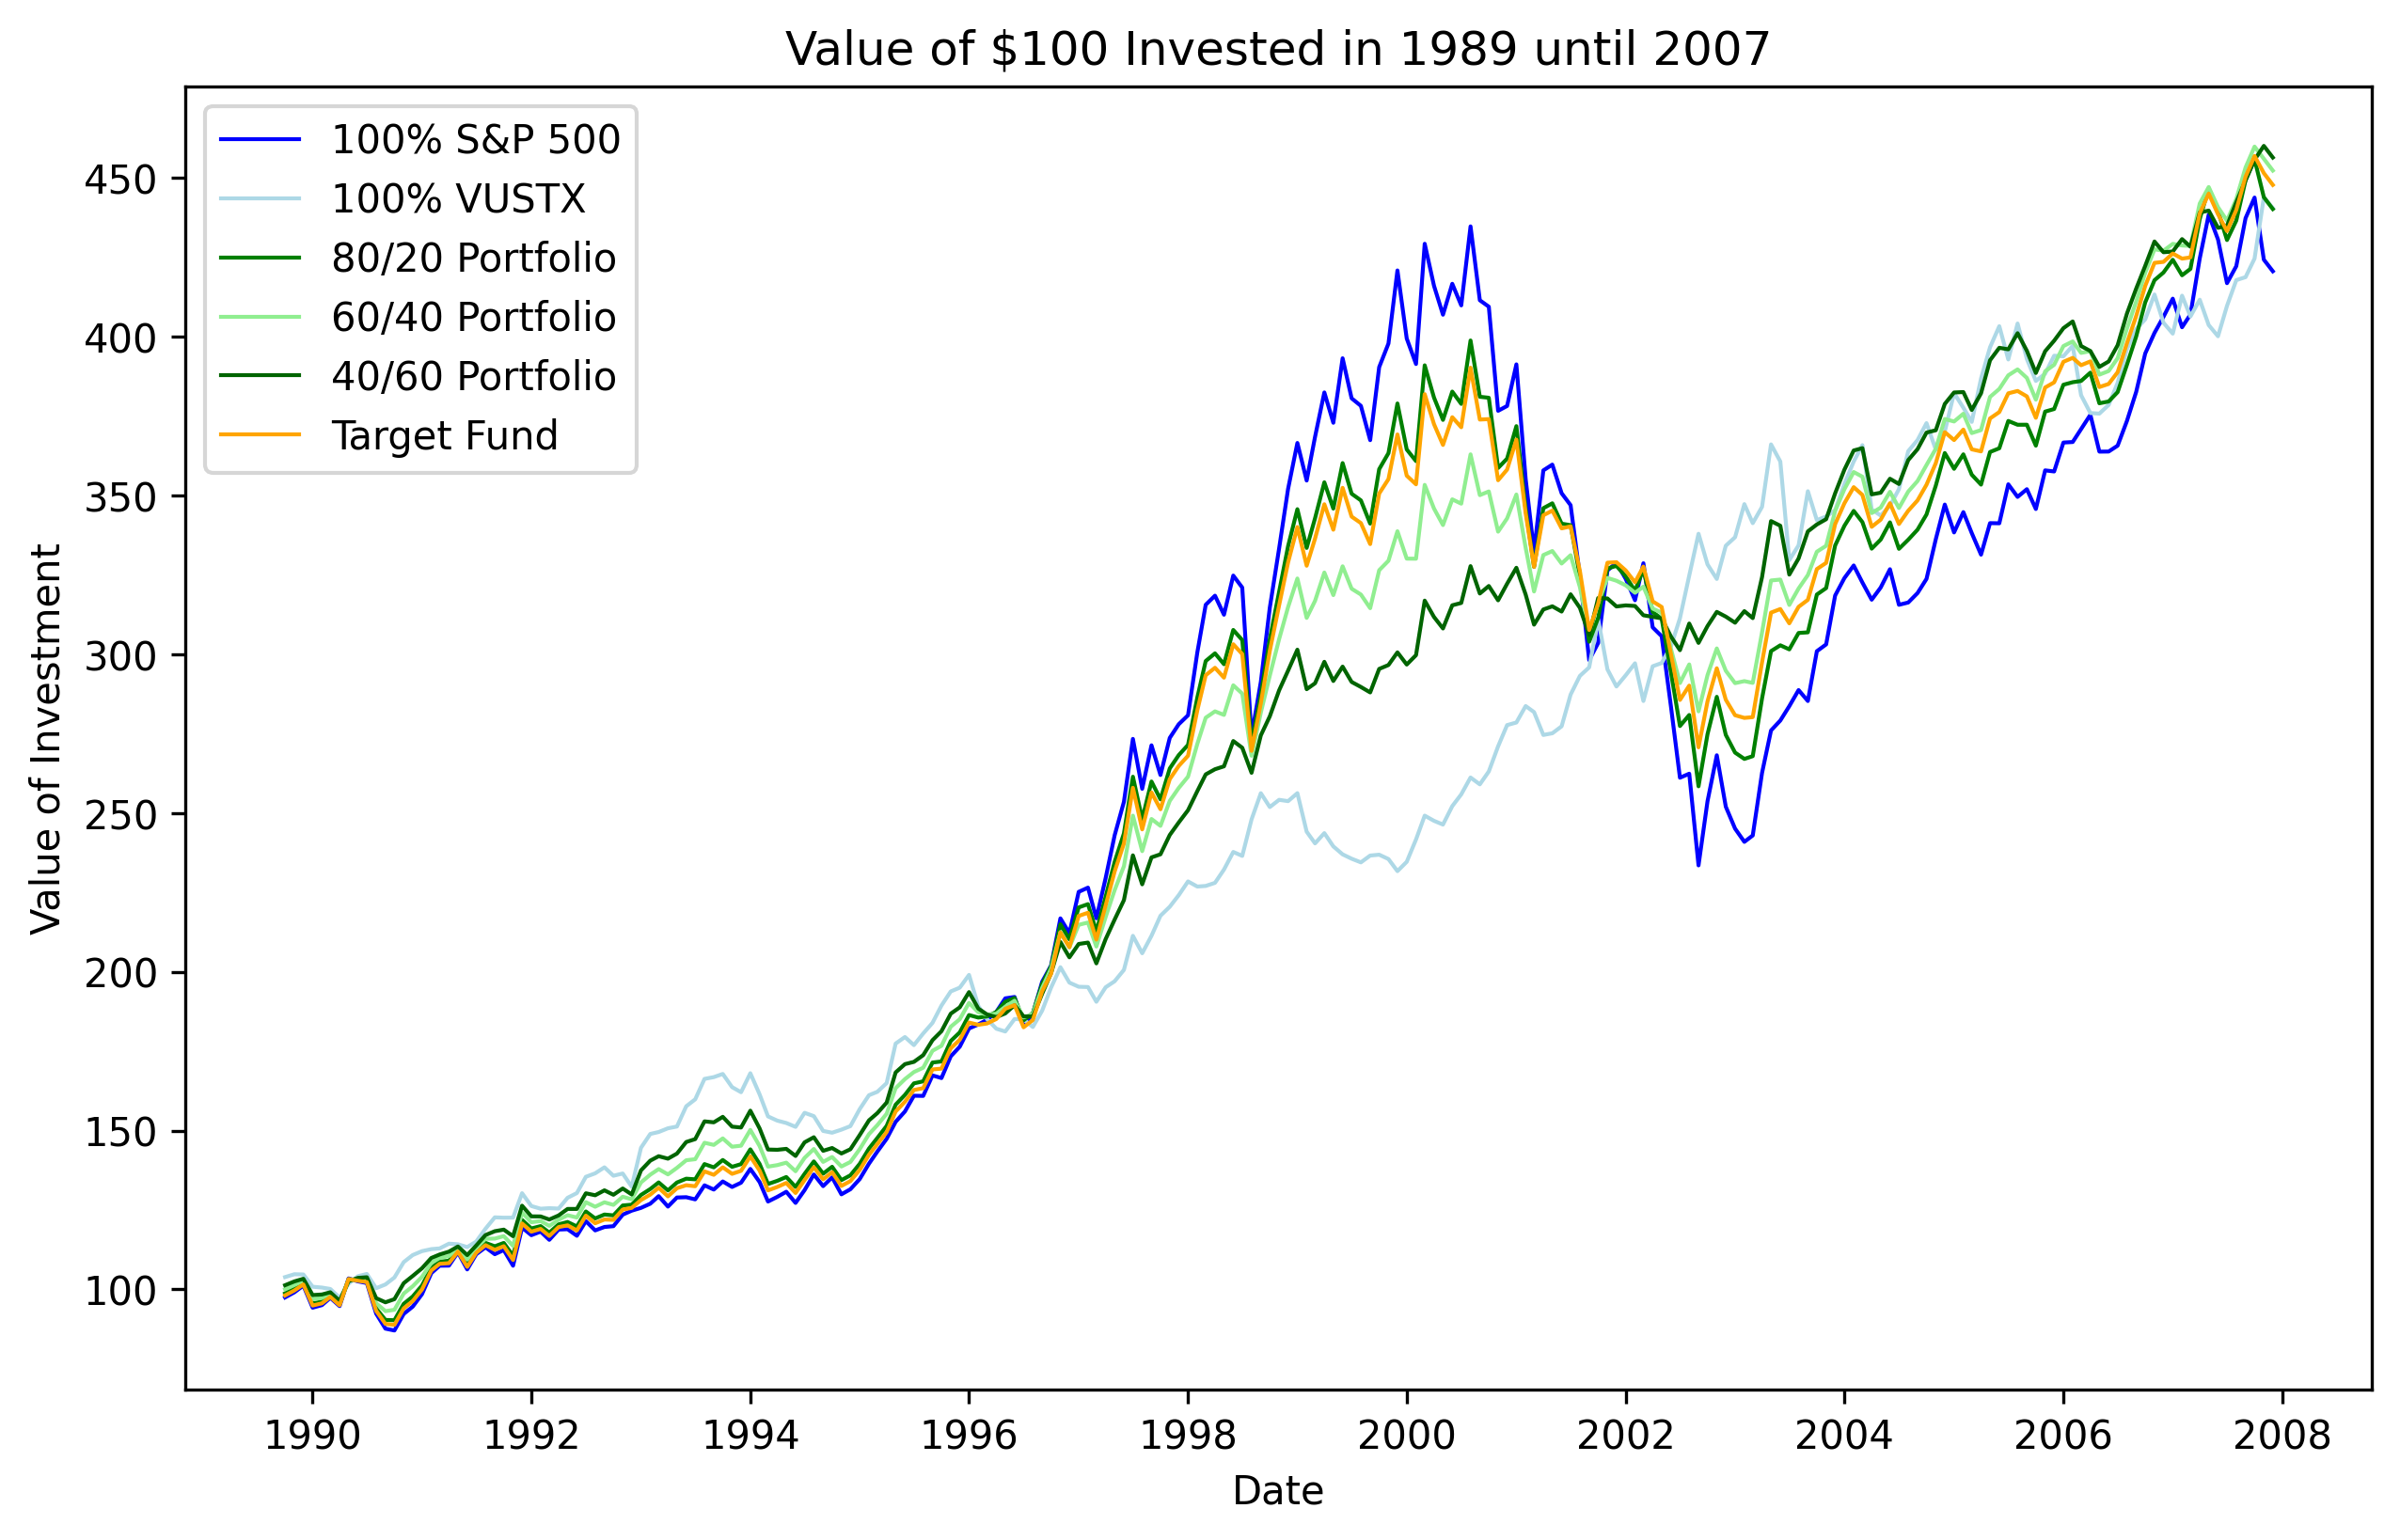

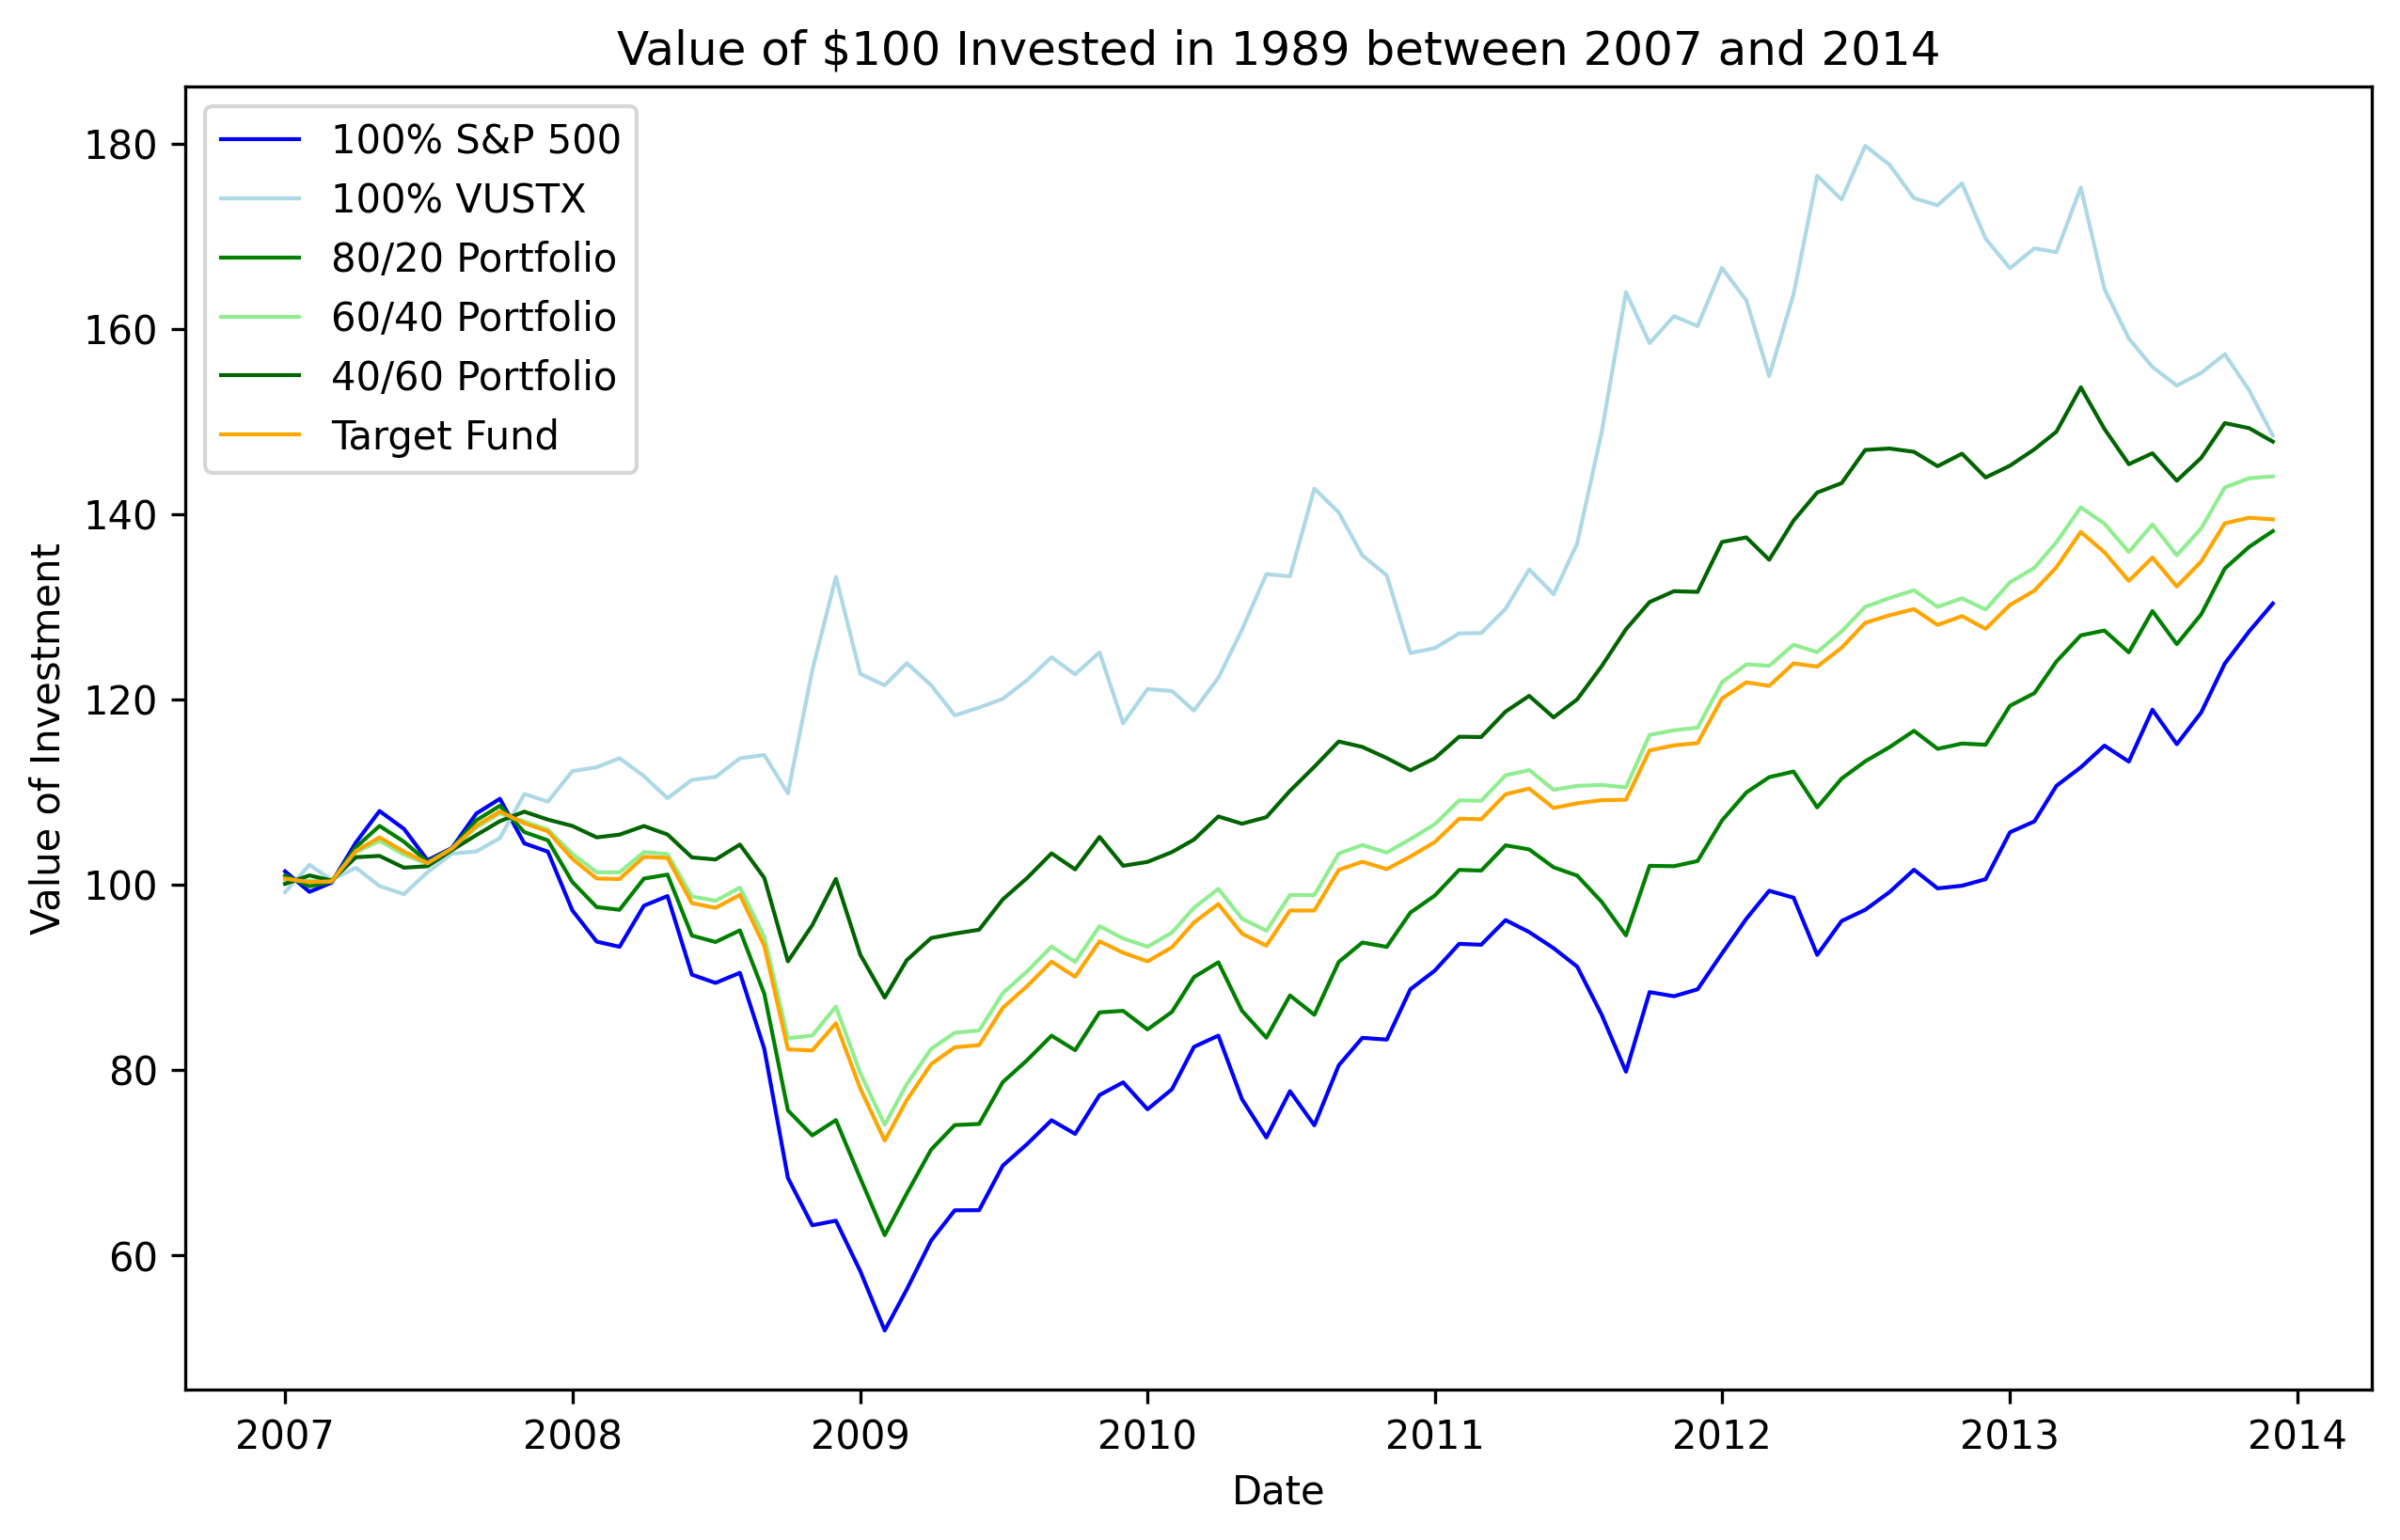

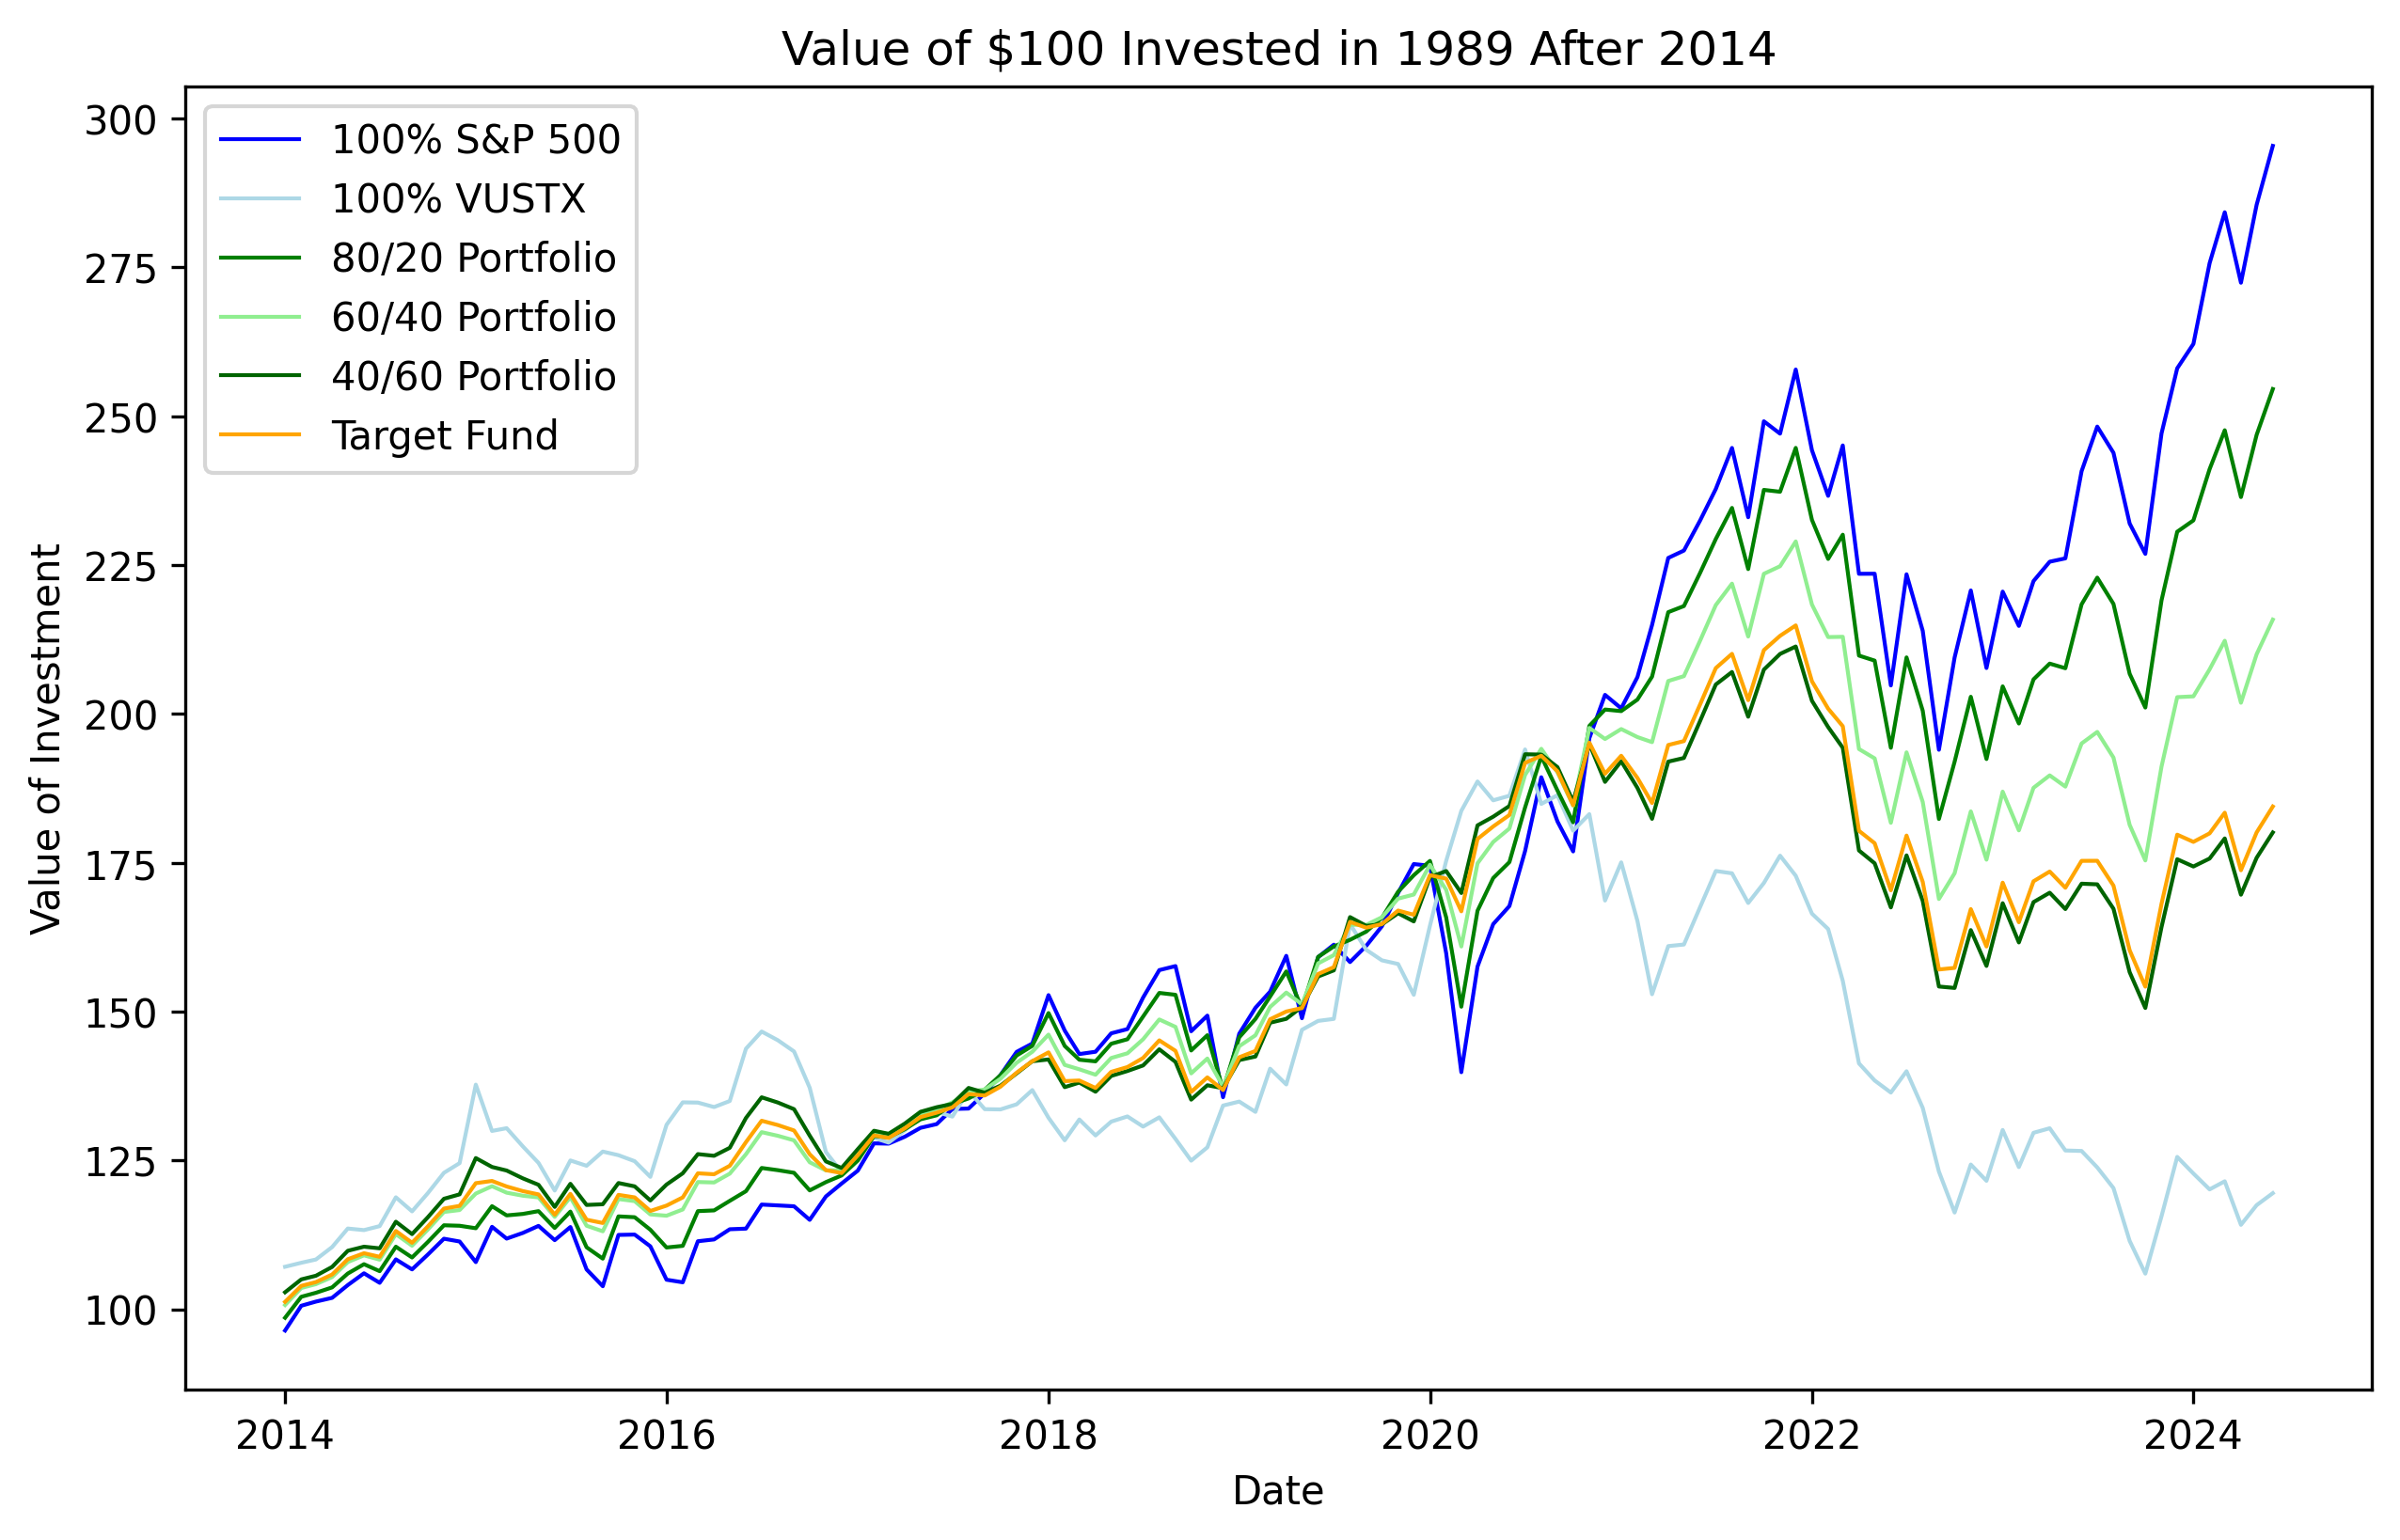

In [2]:
import sys
import subprocess
import importlib
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Ensure packages are properly installed and imported
def install_and_import(package, alias=None):
    try:
        module = importlib.import_module(package)
    except ImportError:
        print(f"{package} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} installed successfully.")
        module = importlib.import_module(package)
        
    if alias:
        globals()[alias] = module
    else:
        globals()[package] = module

install_and_import('yfinance', alias='yf')
yf = globals()['yf']

# Function to calculate volatility
def vol_s(x):
    x = np.array(x)
    n = len(x)
    x_bar = np.mean(x)
    stdev = np.sqrt(np.sum((x - x_bar)**2) / (n - 1))
    return stdev

# Annualize return
def annualize_return(x):
    return (1 + x)**12 - 1

# Define start and end dates
startdate = "1989-09-01"
startyear = startdate.split("-")[0]
end_date_vfinx = "2024-08-01"
end_date_gspix = "2024-07-01"

# Convert dates to datetime objects
startdate_dt = datetime.datetime.strptime(startdate, "%Y-%m-%d")
end_date_vfinx_dt = datetime.datetime.strptime(end_date_vfinx, "%Y-%m-%d")
end_date_gspix_dt = datetime.datetime.strptime(end_date_gspix, "%Y-%m-%d")

# Download S&P 500 data
SP500 = yf.download("^GSPC", start=startdate_dt, end=end_date_vfinx_dt, interval="1mo")

# Download VUST
VUSTX = yf.download("VUSTX", start=startdate_dt, end=end_date_gspix_dt, interval="1mo")

# Remove NA values
print("NaN values in SP500:")
print(SP500['Adj Close'].isna().sum())
print("NaN values in VUSTX:")
print(VUSTX['Adj Close'].isna().sum())

prices_data = pd.concat([SP500['Adj Close'], VUSTX['Adj Close']], axis=1, join='inner')
prices_data.columns = ['SP500', 'VUSTX']

# Calculate percentage returns
print("NaN values in SP500 pct change:")
print(SP500['Adj Close'].pct_change().isna().sum())
print("NaN values in VUSTX pct change:")
print(VUSTX['Adj Close'].pct_change().isna().sum())

SP500_returns = SP500['Adj Close'].pct_change().dropna()
VUSTX_returns = VUSTX['Adj Close'].pct_change().dropna() # do not calculate 

# Align both SP500_returns and VUSTX_returns by date
aligned_returns = pd.concat([SP500_returns, VUSTX_returns], axis=1, join='inner')
aligned_returns.columns = ['SP500', 'VUSTX']

aligned_returns['80/20 Portfolio'] = 0.8* aligned_returns['SP500'] + 0.2* aligned_returns['VUSTX']
aligned_returns['60/40 Portfolio'] = 0.6* aligned_returns['SP500'] + 0.4* aligned_returns['VUSTX']
aligned_returns['40/60 Portfolio'] = 0.4* aligned_returns['SP500'] + 0.6* aligned_returns['VUSTX']

# Target date fund allocation: 90% S&P and 10% Bonds to 40% S&P and 60% Bonds over 35 years
weight_date_row = (0.9 - 0.4) / (len(aligned_returns) - 1)
aligned_returns['Target Fund'] = 0

for i in range(len(aligned_returns)):
    new_value = aligned_returns.iloc[i]['SP500'] * (0.9 - weight_date_row * i) + \
                aligned_returns.iloc[i]['VUSTX'] * (0.1 + weight_date_row * i)
    
    aligned_returns.at[aligned_returns.index[i], 'Target Fund'] = new_value
    #print(0.9 - weight_date_row * i) 


# Plot cumulative returns
plt.figure(figsize=(10, 6), dpi=300)
plt.plot((1 + aligned_returns['SP500']).cumprod() * 100, label="100% S&P 500", linewidth=1, color='blue')
plt.plot((1 + aligned_returns['VUSTX']).cumprod() * 100, label="100% VUSTX", linewidth=1, color='lightblue')
plt.plot((1 + aligned_returns['80/20 Portfolio']).cumprod() * 100, label="80/20 Portfolio", linewidth=1, color='green')
plt.plot((1 + aligned_returns['60/40 Portfolio']).cumprod() * 100, label="60/40 Portfolio", linewidth=1, color='lightgreen')
plt.plot((1 + aligned_returns['40/60 Portfolio']).cumprod() * 100, label="40/60 Portfolio", linewidth=1, color='darkgreen')
plt.plot((1 + aligned_returns['Target Fund']).cumprod() * 100, label="Target Fund", linewidth=1, color='orange')


plt.title(f'Value of $100 Invested in {startyear} (Various Portfolios) (cumulative)')
plt.xlabel("Date")
plt.ylabel("Value of Investment")
plt.legend(loc="upper left")
plt.savefig('./portfolio_cumulative_returns.jpg')

plt.show()


# Plots splitting date into 3 periods

def plot_period_with_monthly_index(aligned_returns_period, title):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot((1 + aligned_returns_period['SP500']).cumprod() * 100, label="100% S&P 500", linewidth=1, color='blue')
    plt.plot((1 + aligned_returns_period['VUSTX']).cumprod() * 100, label="100% VUSTX", linewidth=1, color='lightblue')
    plt.plot((1 + aligned_returns_period['80/20 Portfolio']).cumprod() * 100, label="80/20 Portfolio", linewidth=1, color='green')
    plt.plot((1 + aligned_returns_period['60/40 Portfolio']).cumprod() * 100, label="60/40 Portfolio", linewidth=1, color='lightgreen')
    plt.plot((1 + aligned_returns_period['40/60 Portfolio']).cumprod() * 100, label="40/60 Portfolio", linewidth=1, color='darkgreen')
    plt.plot((1 + aligned_returns_period['Target Fund']).cumprod() * 100, label="Target Fund", linewidth=1, color='orange')

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value of Investment")
    plt.legend(loc="upper left")
    plt.show()


before_2007_monthly = aligned_returns[:'2007']
between_2007_2014_monthly = aligned_returns['2007':'2013']
after_2014_monthly = aligned_returns['2014':]

plot_period_with_monthly_index(before_2007_monthly, 'Value of $100 Invested in 1989 until 2007')
plot_period_with_monthly_index(between_2007_2014_monthly, 'Value of $100 Invested in 1989 between 2007 and 2014')
plot_period_with_monthly_index(after_2014_monthly, 'Value of $100 Invested in 1989 After 2014')



The five portfolios demonstrate similar long-term growth patterns, with the S&P 500 delivering the highest overall returns but also exhibiting greater volatility. As anticipated, the bond-heavy VUSTX portfolio offers stability, particularly during market downturns, but lags in performance during growth periods. As expected, the mixed portfolios strike a balance between risk and return, providing moderate growth with lower volatility compared to the S&P 500, translating into reduced risk for a smoother performance.

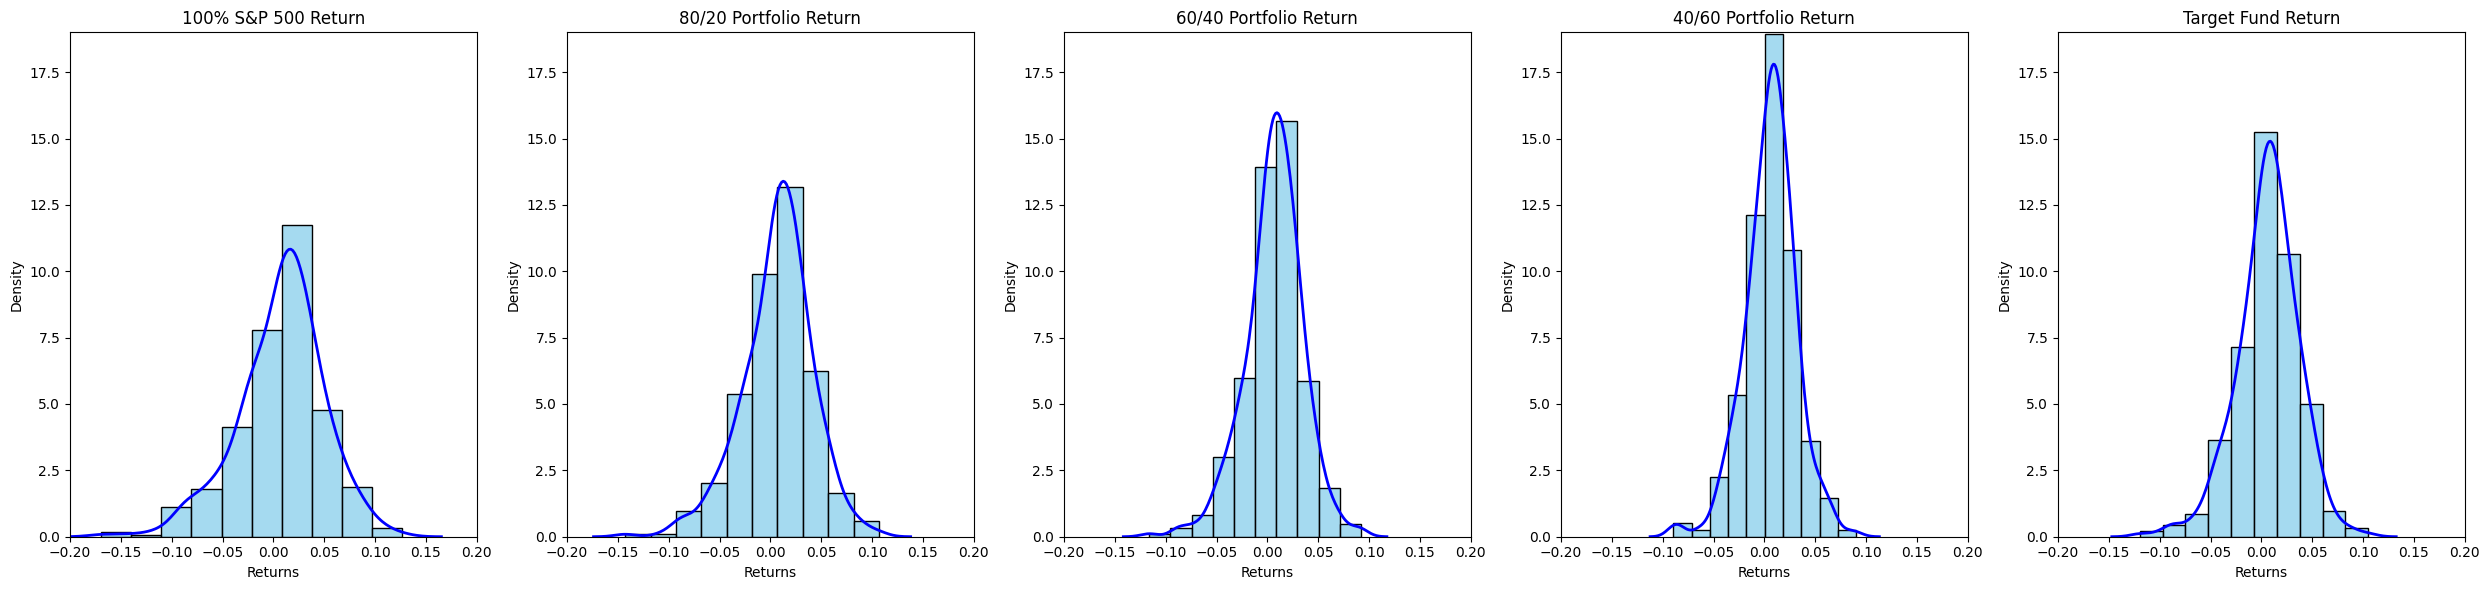

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 5 subplots
fig, ax = plt.subplots(1, 5, figsize=(25, 6))  # Adjusted figsize for better display of 5 plots

# Histogram and Density for 100% S&P 500
sns.histplot(aligned_returns['SP500'], bins=10, kde=False, ax=ax[0], color='skyblue', stat='density')
ax[0].set_xlim(-0.2, 0.2)
ax[0].set_ylim(0, 19)
ax[0].set_xlabel("Returns")
ax[0].set_title("100% S&P 500 Return")
sns.kdeplot(aligned_returns['SP500'], ax=ax[0], color='blue', linewidth=2)

# Histogram and Density for 80/20 Portfolio
sns.histplot(aligned_returns['80/20 Portfolio'], bins=10, kde=False, ax=ax[1], color='skyblue', stat='density')
ax[1].set_xlim(-0.2, 0.2)
ax[1].set_ylim(0, 19)
ax[1].set_xlabel("Returns")
ax[1].set_title("80/20 Portfolio Return")
sns.kdeplot(aligned_returns['80/20 Portfolio'], ax=ax[1], color='blue', linewidth=2)

# Histogram and Density for 60/40 Portfolio
sns.histplot(aligned_returns['60/40 Portfolio'], bins=10, kde=False, ax=ax[2], color='skyblue', stat='density')
ax[2].set_xlim(-0.2, 0.2)
ax[2].set_ylim(0, 19)
ax[2].set_xlabel("Returns")
ax[2].set_title("60/40 Portfolio Return")
sns.kdeplot(aligned_returns['60/40 Portfolio'], ax=ax[2], color='blue', linewidth=2)

# Histogram and Density for 40/60 Portfolio
sns.histplot(aligned_returns['40/60 Portfolio'], bins=10, kde=False, ax=ax[3], color='skyblue', stat='density')
ax[3].set_xlim(-0.2, 0.2)
ax[3].set_ylim(0, 19)
ax[3].set_xlabel("Returns")
ax[3].set_title("40/60 Portfolio Return")
sns.kdeplot(aligned_returns['40/60 Portfolio'], ax=ax[3], color='blue', linewidth=2)

# Histogram and Density for Target Fund
sns.histplot(aligned_returns['Target Fund'], bins=10, kde=False, ax=ax[4], color='skyblue', stat='density')
ax[4].set_xlim(-0.2, 0.2)
ax[4].set_ylim(0, 19)
ax[4].set_xlabel("Returns")
ax[4].set_title("Target Fund Return")
sns.kdeplot(aligned_returns['Target Fund'], ax=ax[4], color='blue', linewidth=2)

# Show the plot
plt.tight_layout()
plt.show()



*   **Volatility**: The 100% S&P 500 portfolio exhibits the most volatility, while portfolios with more bond exposure (40/60 and the Target Fund) show more stability and narrower return distributions.
*   **Risk-Return Trade-Off**: The riskier portfolios (S&P 500 and 80/20) offer the potential for higher returns but also expose investors to greater losses. On the other hand, the more conservative portfolios (60/40, 40/60, and Target Fund) offer more consistent but lower returns, better suited for risk-averse investors.
*   **Balanced Approach:** Portfolios with a mix of bonds and equities (like the 80/20 or 60/40 portfolios) attempt to balance risk and return, offering a compromise between high volatility and steady growth.

Overall, the histograms demonstrate the trade-off between higher-return portfolios, like the 100% S&P 500, which come with greater volatility, and more conservative portfolios with bond exposure that offer stability and lower returns. Investors must align their portfolio choices with their risk tolerance and long-term financial goals, balancing potential gains against exposure to market fluctuations.
olios with a mix of bonds and equities (like the 80/20 or 60/40 portfolios) attempt to balance risk and return, offering a compromise between high volatility and steady growth.

### 1. **Standard Deviation (Volatility)**

The standard deviation of returns is calculated as:

$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}
$$

Where:
- $ \sigma $ = Standard deviation
- $ r_i $ = Return in period \(i\)
- $ \bar{r} $ = Average return
- $ n $ = Number of observations

---

### 2. **Skewness**

Skewness measures the asymmetry of the return distribution around the mean:

$$
\text{Skewness} = \frac{\frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^3}{\left( \frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^2 \right)^{3/2}}
$$

Where:
- $ \bar{r} $ = Average return
- $ r_i $ = Return in period \(i\)
- $ n $ = Number of observations

---

### 3. **Kurtosis**

Kurtosis measures the "tailedness" of the return distribution:

$$
\text{Kurtosis} = \frac{\frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^4}{\left( \frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^2 \right)^2}
$$

Where:
- $ \bar{r} $ = Average return
- $ r_i $ = Return in period \(i\)
- $ n $ = Number of observations

---

### 4. **Value at Risk (VaR)**

The Value at Risk at a confidence level \( \alpha \) is defined as:

$$
\text{VaR}_\alpha = -\text{Quantile}_\alpha(r)
$$

Where:
- $ \alpha $ = Confidence level (e.g., 95% or 99%)
- $ r $ = Return distribution

At a 95% confidence level:

$$
\text{VaR}_{95\%} = - \text{Quantile}_{0.05}(r)
$$


In [4]:

# Calculate Standard Deviation
std_dev = aligned_returns.std()

# Calculate Skewness
skewness = aligned_returns.skew()

# Calculate Kurtosis
kurtosis = aligned_returns.kurtosis()

# Function to calculate VaR at a given confidence level
def calculate_var(returns, confidence_level=0.95):
    return returns.quantile(1 - confidence_level)

# Calculate VaR for each portfolio at 95% confidence level
var_95 = aligned_returns.apply(calculate_var, confidence_level=0.95)

# Combine all metrics into one DataFrame
summary_table = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'VaR (95%)': var_95
})

# Display the table
print("Summary of Portfolio Metrics with VaR:")
print(summary_table)




Summary of Portfolio Metrics with VaR:
                 Standard Deviation  Skewness  Kurtosis  VaR (95%)
SP500                      0.042838 -0.542119  0.994289  -0.071901
VUSTX                      0.032228  0.169291  1.039600  -0.048138
80/20 Portfolio            0.034690 -0.508461  1.138489  -0.054140
60/40 Portfolio            0.028423 -0.457429  1.408644  -0.044192
40/60 Portfolio            0.025467 -0.341992  1.412504  -0.036378
Target Fund                0.030622 -0.440266  1.269688  -0.045628


- **Volatility (Standard Deviation)**: 
    - The S&P 500 exhibits the highest standard deviation (**0.0428**), reflecting its higher risk and more substantial price fluctuations compared to other portfolios.
    - As the bond allocation increases, volatility decreases, with the 40/60 Portfolio and VUSTX exhibiting the lowest standard deviations. 
    - This is consistent with the stabilizing effect of bonds, which reduce overall portfolio volatility.
    
- **Skewness**:
    - Most portfolios exhibit negative skewness, particularly the S&P 500 and equity-heavy portfolios (80/20, 60/40), indicating a higher likelihood of extreme negative returns (left-tail risk).
    - The VUSTX portfolio, being bond-heavy, is slightly positively skewed (**0.169**), suggesting a higher probability of small positive returns, aligning with bonds' safer, more stable behavior.

- **Kurtosis**:
    - The kurtosis values across all portfolios are greater than 1, indicating **leptokurtic** distributions, which are prone to occasional extreme returns, either positive or negative.
    - The higher kurtosis in mixed portfolios like 60/40 and 40/60 (above **1.4**) suggests a greater probability of extreme events compared to pure equity (S&P 500) and bond-heavy portfolios (VUSTX), meaning these portfolios are more susceptible to extreme positive or negative returns compared to pure equity or bond-heavy portfolios.

- **Value at Risk (VaR 95%)**:
    - The S&P 500 portfolio has the largest negative VaR (**-0.0719**), meaning an investor could expect to lose up to 7.19% in a bad month with 95% confidence.
    - The bond-heavy VUSTX portfolio has a much lower VaR (**-0.0481**), indicating a smaller potential downside.
    - Adding bonds to portfolios, like the 80/20, 60/40, and 40/60 portfolios, systematically reduces VaR, making them more suitable for risk-averse investors.

- **Tail Risk Management**:
    - Investors seeking to minimize tail risk would prefer portfolios with lower kurtosis and VaR, such as VUSTX, which provides stability during downturns.
    - The negative skewness of equity-heavy portfolios highlights the importance of considering downside risk when constructing portfolios with higher equity allocations.

- **Risk-Return Tradeoff and Skewness-Kurtosis Implications**:
    - The negative skewness and leptokurtic behavior of the S&P 500 and mixed portfolios suggest they are prone to sudden, sharp losses (left-tail risk).

Next, we plot the rollling average mean and volatility.

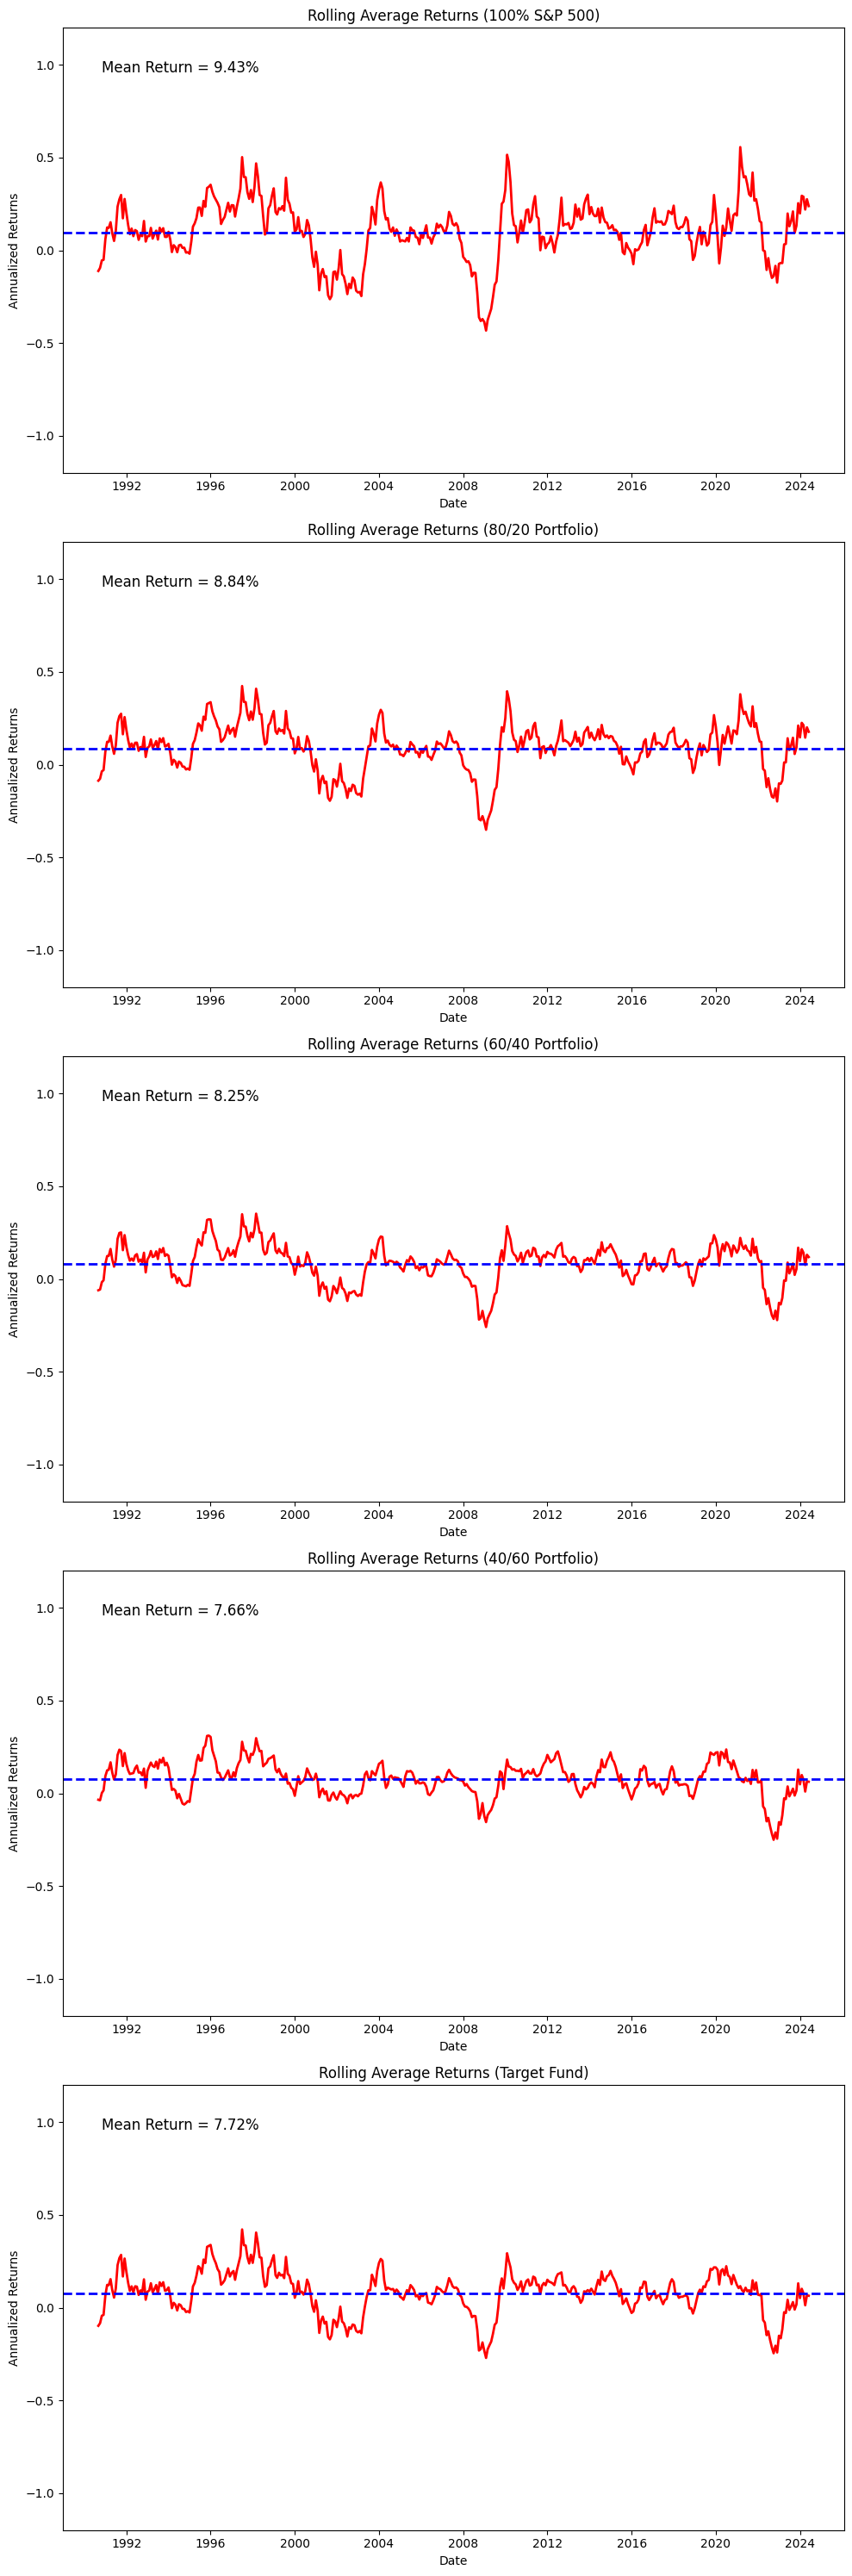

In [8]:
# Create a figure with multiple subplots (one for each portfolio), each in its own row
fig, ax = plt.subplots(len(portfolios), 1, figsize=(10, 30))

rollmean = aligned_returns.rolling(window=12).mean()
annualized_rollmean = (1 + rollmean)**12 - 1

# Loop through the portfolios to plot each
for i, (key, title) in enumerate(portfolios.items()):
    # Plot rolling average returns
    ax[i].plot(annualized_rollmean[key], color='red', linewidth=2)
    ax[i].set_title(f"Rolling Average Returns ({title})")
    ax[i].set_ylim(-1.2, 1.2)
    ax[i].set_xlabel("Date")
    ax[i].set_ylabel("Annualized Returns")

    # Calculate and plot the mean return as a horizontal line
    annualized_mean = annualize_return(aligned_returns[key].mean()) 
    ax[i].axhline(y=annualized_mean, color='blue', linestyle='--', linewidth=2)
    ax[i].text(0.05, 0.9, f"Mean Return = {round(annualized_mean*100, 2)}%", 
               transform=ax[i].transAxes, color='black', fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()

# Display the plot
plt.show()


**Rolling Average Returns: Long-Term Growth**

The S&P 500 boasts a mean return of 9.43%, showing strong long-term growth, but also significant fluctuations during downturns like 2000 and 2008. The 80/20 Portfolio offers a slightly lower return of 8.84% but with less volatility, striking a good balance between growth and risk. The 60/40 Portfolio, with a mean return of 8.25%, is more conservative, providing smoother performance with less fluctuation. The 40/60 Portfolio yields 7.66%, offering the most stability with smaller fluctuations, ideal for risk-averse investors. The Target Fund shows a return of 7.72%, providing balance by gradually shifting to safer assets over time.

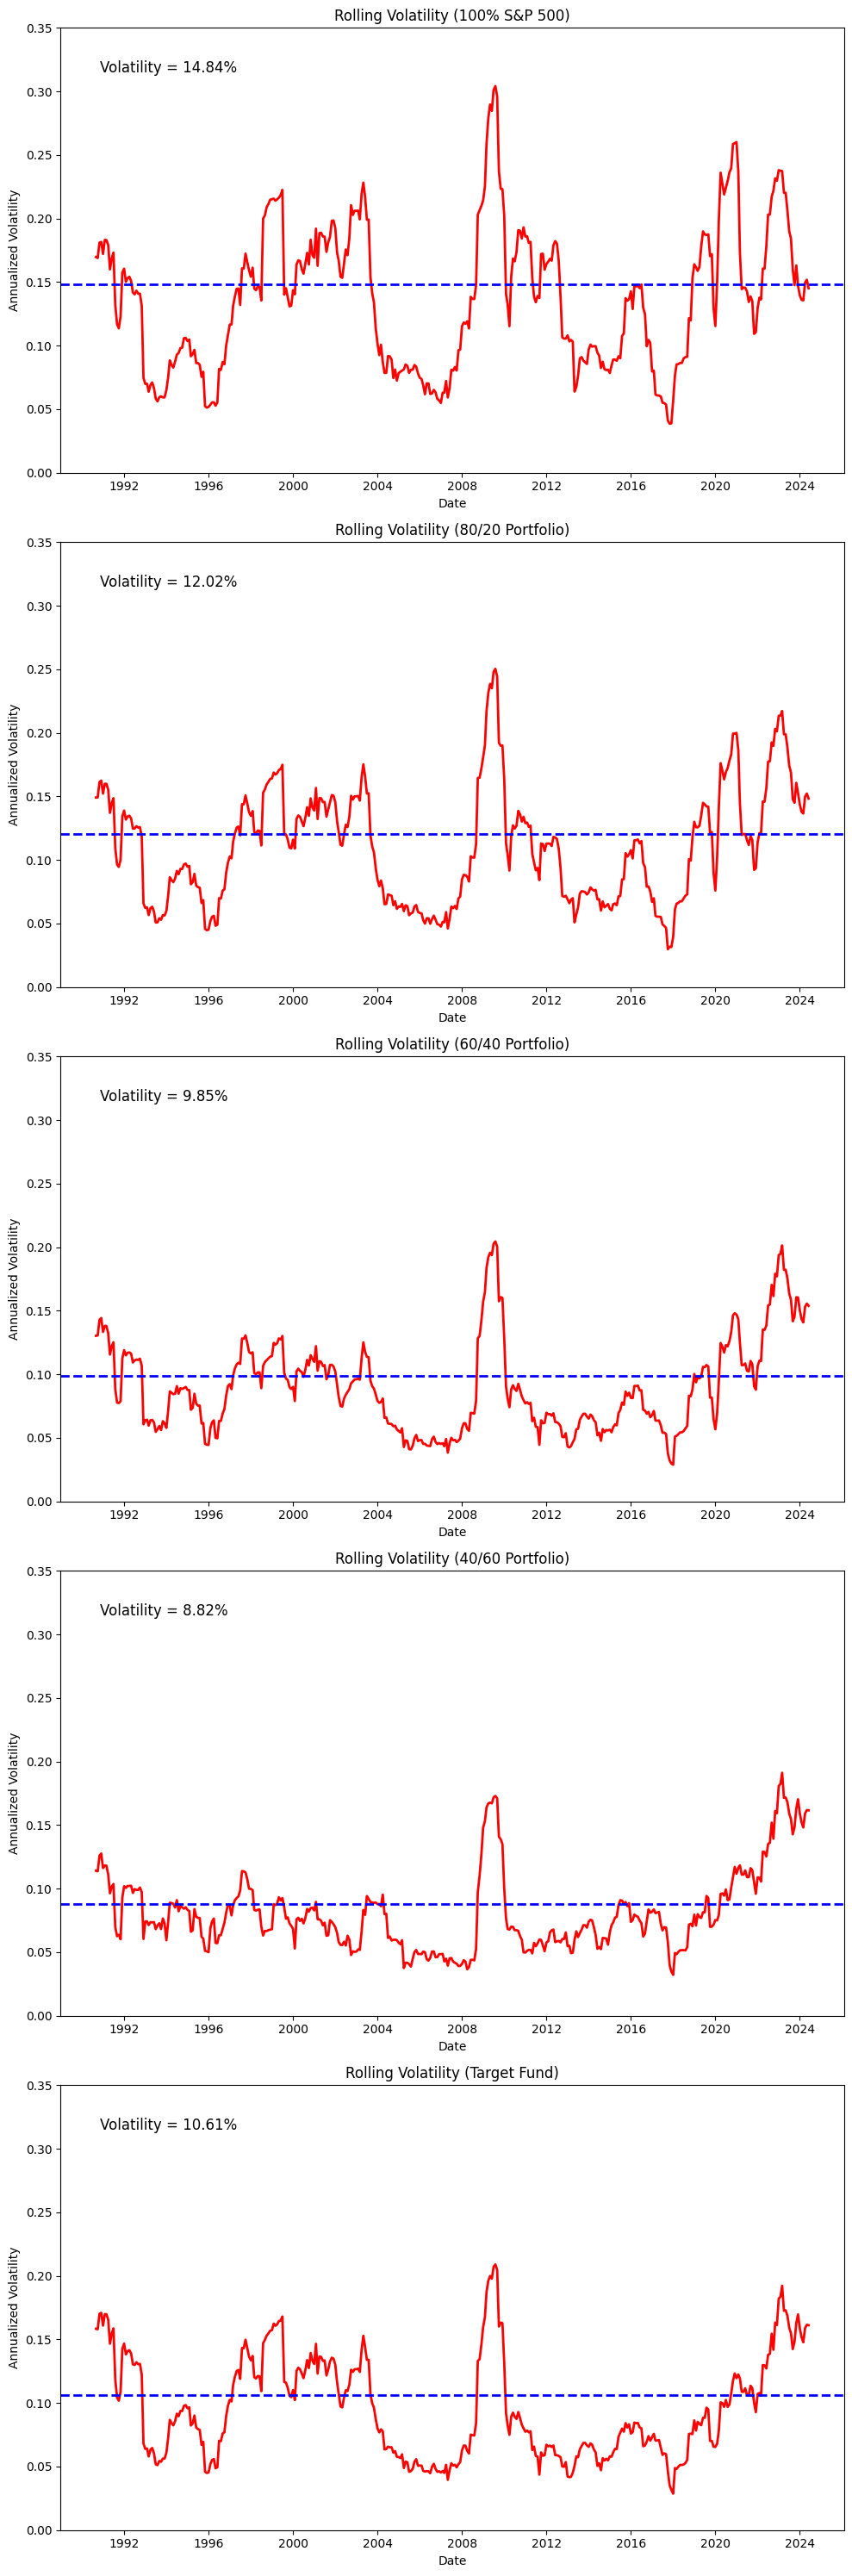

In [10]:
# Create a figure with multiple subplots (one for each portfolio), each in its own row
fig, ax = plt.subplots(len(portfolios), 1, figsize=(10, 30))  # 5 rows, 1 column

# Calculate the 12-month rolling annualized standard deviation
rollvol = aligned_returns.rolling(window=12).apply(vol_s, raw=True)

# Annualize the rolling volatility
annualized_rollvol = rollvol * np.sqrt(12)

portfolios = {
    'SP500': "100% S&P 500",
    '80/20 Portfolio': "80/20 Portfolio",
    '60/40 Portfolio': "60/40 Portfolio",
    '40/60 Portfolio': "40/60 Portfolio",
    'Target Fund': "Target Fund"
}

# Loop through the portfolios to plot each
for i, (key, title) in enumerate(portfolios.items()):
    # Plot rolling annualized volatility
    ax[i].plot(annualized_rollvol[key], color='red', linewidth=2)
    ax[i].set_title(f"Rolling Volatility ({title})")
    ax[i].set_ylim(0, 0.35)
    ax[i].set_xlabel("Date")
    ax[i].set_ylabel("Annualized Volatility")

    # Calculate and plot the mean volatility as a horizontal line
    annualized_vol = vol_s(aligned_returns[key]) * np.sqrt(12)
    ax[i].axhline(y=annualized_vol, color='blue', linestyle='--', linewidth=2)
    ax[i].text(0.05, 0.9, f"Volatility = {round(annualized_vol*100, 2)}%", transform=ax[i].transAxes, color='black', fontsize=12)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


**Rolling Volatility: Risk Exposure**

The S&P 500 has the highest volatility at 14.84%, confirming its high-risk, high-reward nature. The 80/20 Portfolio is less volatile at 12.02%, offering stability with growth potential. The 60/40 Portfolio reduces risk further, with volatility at 9.85%, while the 40/60 Portfolio exhibits the lowest volatility at 8.82%, prioritizing risk reduction. The Target Fund has a moderate volatility of 10.61%, reflecting its balanced approach as it nears the target date of betting minium in S&P500.

**Conclusion: Balancing Risk and Return**

The S&P 500 offers the highest returns but with substantial volatility. The 80/20 and 60/40 portfolios provide a balanced risk-return profile, while the 40/60 Portfolio and Target Fund focus on stability with lower returns. Investors must choose based on their risk tolerance and financial goals, as higher equity allocations lead to better growth but greater risk.

Last, we calculate **Annualized Return (%), Annualized Volatility (%), Max Drawdown (%), Sharpe Ratio** based on these formulae:

### 1. **Annualized Return (%):**
The annualized return is calculated as:

$$
\text{Annualized Return} = \left( \prod_{i=1}^{n} (1 + r_i) \right)^{\frac{252}{n}} - 1
$$

Where:
- $ r_i $ = Daily return
- $ n $ = Number of days
- 252 represents the number of trading days in a year.

---

### 2. **Annualized Volatility (%):**
The annualized volatility is the standard deviation of returns, adjusted for the number of trading days:

$$
\text{Annualized Volatility} = \sigma_{\text{daily}} \times \sqrt{252}
$$

Where:
- $ \sigma_{\text{daily}} $ = Daily standard deviation of returns
- 252 represents the number of trading days in a year.

---

### 3. **Max Drawdown (%):**
Maximum drawdown measures the largest peak-to-trough decline in portfolio value:

$$
\text{Max Drawdown} = \min \left( \frac{P_t - P_{\text{peak}}}{P_{\text{peak}}} \right)
$$

Where:
- $ P_t $ = Portfolio value at time $ t $
- $ P_{\text{peak}} $ = Previous peak value of the portfolio.

---

### 4. **Sharpe Ratio:**
The Sharpe ratio measures the risk-adjusted return of a portfolio:

$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$

Where:
- $ R_p $ = Annualized portfolio return
- $ R_f $ = Risk-free rate (can be assumed 0 if not specified)
- $ \sigma_p $ = Annualized portfolio volatility.


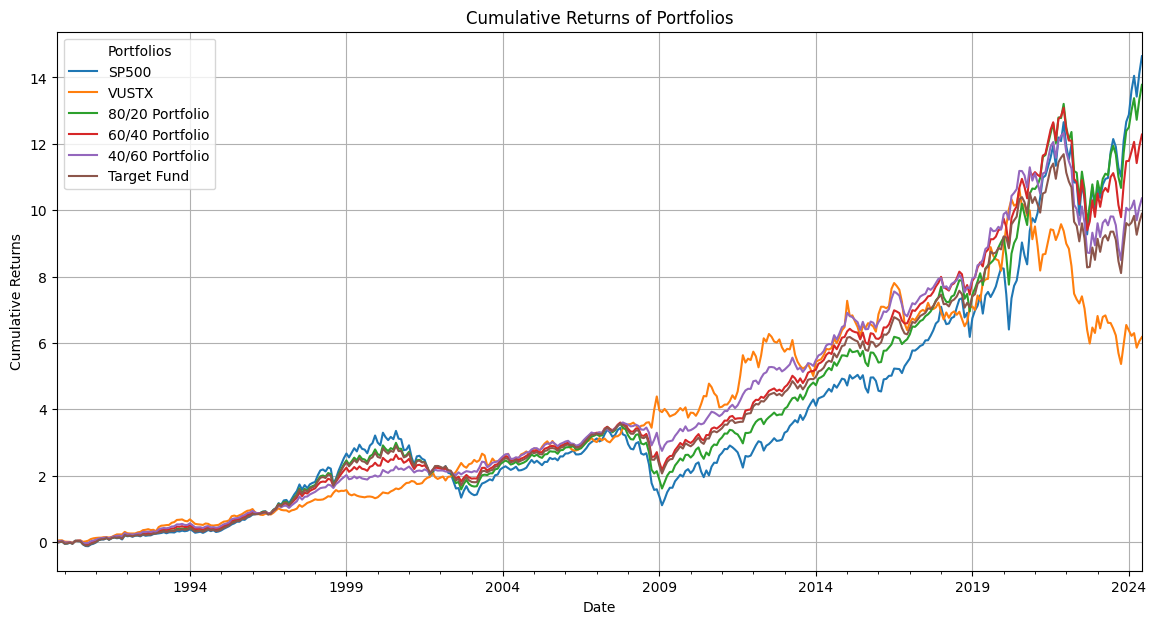

Summary of Portfolio Performance Metrics:


,Annualized Return (%),Annualized Volatility (%),Max Drawdown (%),Sharpe Ratio
SP500,190.044600,68.003941,-52.555859,2.794612
VUSTX,132.322363,51.160338,-45.377233,2.586425
80/20 Portfolio,178.500152,55.068427,-42.732904,3.241425
60/40 Portfolio,166.955705,45.119995,-31.234276,3.700260
40/60 Portfolio,155.411258,40.427500,-28.731346,3.844197
Target Fund,156.557385,48.610219,-32.952158,3.220668


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative returns
cumulative_returns = (1 + aligned_returns).cumprod() - 1

# Calculate annualized average returns (Assuming 252 trading days)
annualized_returns = aligned_returns.mean() * 252

# Calculate annualized volatility (Assuming 252 trading days)
annualized_volatility = aligned_returns.std() * np.sqrt(252)

# Calculate maximum drawdown
rolling_max = (1 + aligned_returns).cumprod().cummax()
daily_drawdown = (1 + aligned_returns).cumprod() / rolling_max - 1
max_drawdown = daily_drawdown.min()

# Calculate Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = annualized_returns / annualized_volatility

# Combine all the calculated metrics into a single DataFrame
summary_table = pd.DataFrame({
    'Annualized Return (%)': annualized_returns * 100,
    'Annualized Volatility (%)': annualized_volatility * 100,
    'Max Drawdown (%)': max_drawdown * 100,
    'Sharpe Ratio': sharpe_ratio
})

# Plot cumulative returns
cumulative_returns.plot(figsize=(14, 7))
plt.title('Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(title="Portfolios")
plt.grid(True)
plt.show()

# Display the summary table
print("Summary of Portfolio Performance Metrics:")
display(summary_table)


- **Annualized Returns: Assessing Growth Potential**
    - The **S&P 500** achieves the highest annualized return at **1.90**, confirming its role as the top-performing portfolio in terms of growth. This high return reflects the potential for strong equity-driven gains over time.
    - The **80/20 Portfolio** follows closely with a return of **1.78**, offering a good mix of growth and stability by incorporating bonds into its allocation.
    - The **60/40 Portfolio** (**1.67%**) and **40/60 Portfolio** (**1.55%**) show progressively lower returns as bond exposure increases, reducing growth potential but offering more consistency.
    - The **Target Fund** stands at **1.57%**, striking a balance between moderate returns and reduced risk.
    - **VUSTX**, with a return of **1.32%**, reflects the lowest growth, focusing on minimizing risk through its bond-heavy structure.

- **Annualized Volatility: Measuring Risk**
    - The **S&P 500** shows the highest annualized volatility at **0.68**, reinforcing its high-risk, high-reward nature.
    - The **80/20 Portfolio** reduces this risk slightly, with volatility at **0.55**, offering more stability while maintaining growth potential.
    - The **60/40 Portfolio** (**0.45%**) and **40/60 Portfolio** (**0.40%**) provide progressively lower volatility, making them more attractive to risk-averse investors.
    - The **Target Fund** (**0.49%**) and **VUSTX** (**0.51%**) maintain lower volatility, prioritizing capital preservation and stability over aggressive growth.

- **Maximum Drawdown: Managing Losses**
    - The **S&P 500** experiences the largest maximum drawdown at **-0.53**, highlighting its vulnerability during major market downturns.
    - The **80/20 Portfolio** sees significant drawdowns at **-0.43**, though bond exposure cushions losses somewhat.
    - The **60/40 Portfolio** (**-0.31%**) and **40/60 Portfolio** (**-0.29%**) experience smaller drawdowns, reflecting their more conservative approach to risk.
    - **VUSTX**, with a drawdown of **-0.45%**, still faces notable losses despite its bond-heavy allocation.
    - The **Target Fund** has a moderate drawdown of **-0.33%**, consistent with its gradual shift toward conservative investments as it nears the target date.

- **Conclusion: Balancing Risk and Return**
    - The **S&P 500** provides the highest returns but also comes with the most volatility and steepest drawdowns, making it best suited for investors with a high-risk tolerance.
    - The **80/20 Portfolio** offers a more balanced approach, delivering strong returns with somewhat lower risk.
    - The **60/40 Portfolio** and **40/60 Portfolio** continue to reduce volatility and drawdowns, prioritizing stability over growth.
    - **VUSTX** and the **Target Fund** focus primarily on minimizing risk and volatility, ideal for investors seeking capital preservation with lower returns.

- **Overall**: Portfolios with higher equity exposure deliver better growth but also face higher volatility and deeper losses during market downturns, while bond-heavy portfolios provide more stable, consistent performance with limited growth.


### b-c) **Portfolio Recommendation for a 30-Year-Old U.S. Investor Saving for Retirement**

For a 30-year-old investor with a long-term horizon of 35 years until retirement, the **80/20 Portfolio** is recommended. This portfolio offers a **balance between growth potential and stability**, with an **annualized return of 1.78%** and **moderate volatility of 0.55%**. The higher equity exposure enables the investor to benefit from market growth over the long term, while the bond allocation provides a cushion during periods of market downturn.

- **Growth Potential:** With equities comprising **80%** of the portfolio, it allows the investor to capitalize on stock market growth, a critical factor for accumulating wealth over a long investment period.
- **Risk Tolerance:** At **30 years old**, the investor is able to take on higher risk, with sufficient time to recover from short-term market volatility.

- **Volatility Management:** The **bond allocation** helps to moderate the overall volatility of the portfolio, ensuring that it is not fully exposed to market crashes, as demonstrated by the **maximum drawdown of -0.43%**, which is lower than the S&P 500’s **-0.53%**.

### **Recommendation for a 60-Year-Old Investor**

For a **60-year-old investor**, the **40/60 Portfolio** is recommended. With only **5 years remaining** until retirement, the emphasis should shift toward **capital preservation** and reducing risk exposure.

- **Stability:** The **40/60 Portfolio** exhibits an **annualized volatility of 0.40%**, significantly lower than portfolios with greater equity exposure. This helps protect against substantial losses as retirement approaches.
- **Lower Drawdowns:** The **maximum drawdown of -0.29%** reflects the portfolio’s ability to guard against major market downturns, a crucial consideration for an investor with a shorter time horizon.
- **Adequate Growth:** Though the **annualized return of 1.55%** is lower than that of equity-heavy portfolios, it still provides **modest growth**, allowing the investor to benefit from some market appreciation without assuming excessive risk.

### **Potential Caveats in the Analysis**

- **Historical Performance:** The analysis is based on **historical returns**, volatility, and drawdowns. However, **past performance does not guarantee future results**, and financial markets may behave differently in response to changing economic conditions, interest rates, or geopolitical factors.
- **Inflation Risk:** The portfolios do not explicitly factor in inflation adjustments. Over a long investment horizon, such as 35 years, **inflation may erode purchasing power**, and the real impact of expected returns may be diminished.
- **Interest Rate Sensitivity:** Portfolios with a higher bond allocation, such as the **40/60 Portfolio** and **VUSTX**, may face additional risk from rising interest rates, which can negatively affect bond prices and overall portfolio performance.
- **Personal Risk Tolerance:** This analysis assumes a moderate to high risk tolerance based on age. However, **individual preferences for risk and return vary**, and the recommended portfolio should be aligned with the investor’s personal comfort level, not only their age and time horizon.

### **Conclusion**

For a **30-year-old investor** saving for retirement, the **80/20 Portfolio** provides an optimal balance between growth and stability, allowing the investor to capitalize on market gains while managing risk. For a **60-year-old investor** approaching retirement, the **40/60 Portfolio** is preferable due to its focus on stability and capital preservation. However, the analysis has limitations, particularly regarding the assumptions based on historical performance and interest rate sensitivity, which must be considered when making investment decisions.
